# Notebook Mathis
Script is used for data in `Masterarbeit\Alsdorf\Daten\export\export_as_txt`

In this notebook I create my own plots and calibrations. I will use some information from other scripts, but general speaking I will start from 0. I also copied the data directly from the device in Alsdorf. My describtion how to export the data and how to wrk with the database can be found in ``Masterarbeit\Charon3_Tipps_Tricks.md``

eine gute idee wäre es evntl die stokes daten zu importieren und probieren die gleichen ergebnisse zu erzeugen wie die temp daten von dem Gerät. Norbert fragen ob das eine gute idee ist, wird relativ aufwändig. --> Ja soll ich so machen

Ab welcher Tiefe beginnt das Bohrloch? Bei Daniel Etwas unklar. Wo kann ich das am besten nachlesen?

Daniel hat die Daten etwas anders exportiert als ich, also .txt file ist anders aufgebaut

Temperatur Messungen nach step losses können die Temperaturmessung danach noch beeinflussen (verringern).

## DTS Primer S 39 u. 40 für calibration von Daten. Hat daniel glaube ich nicht so gemacht oder? Nochmal genau prüfen und ggf. be Treffen fragen.
### kap 6 enthält auch beschreibungen zu korrekturen

# Dieses Skript funktioniert noch nicht gut, am Ende wird noch etwas falsch eingelesen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.dates as mdates

def import_data_alsdorf(data_path):
    """ imports data to a pandas dataframe from a given path
    input: 
        data_path: str position of the data. Format has to contain all possible information from charon3: 
        This means exporting the data with all possible options of information (default). 
        This means with all box tiked in the export window.
    
    output: pandas dataframe
    """
    temp_ch = pd.read_csv(data_path, delimiter="\t", decimal=",", skiprows=3, index_col=1) 
    # set index; not really needed because index and length are the same. 
    # But I think it is best practice to use every information from the dataset

    # drop numerate column
    temp_ch = temp_ch.drop([temp_ch.columns[0]] , axis=1) # .columns is used here too

    # rename index
    temp_ch.index.names = ["Length [m]"]

    # change column name format (str) to datetime
    temp_ch.columns = pd.to_datetime(temp_ch.columns)

    return temp_ch

In [2]:
# Import Data
path_to_working_dir=r"..\Alsdorf\Daten\export\export_as_txt"
ch1_temp_path=path_to_working_dir + r"\ch1_temp_20210131_20210322.TXT"
ch2_temp_path=path_to_working_dir + r"\ch2_temp_20210131_20210322.TXT"


temp_ch2=import_data_alsdorf(ch2_temp_path)
temp_ch1=import_data_alsdorf(ch1_temp_path)

display(temp_ch2)
display(temp_ch1)





##########################################################################################################################
#Older version of import much more complicated - can be deleted
#
## skiprows needed, otherwise columns are not recognised; decimal="," does not work due to date I think? 
## Maybe its faster to also skip the date row and load the data with decimal=",". And then load the date row seperate.
## low_memory is needed because the decimal=",", does not recognise all
#temp_ch2 = pd.read_csv(ch2_temp_path, delimiter="\t", decimal=",", skiprows=1, low_memory=False) 
## copy length values to length variable, used for indexing later
#length=temp_ch2[temp_ch2.columns[1]] # .columns is used so you dont have to know the column name
#length=length.drop([0,1], axis=0) # numerate and date row are droped
#length=np.array(length)
## drop numerate and length column
#temp_ch2 = temp_ch2.drop([temp_ch2.columns[0],temp_ch2.columns[1]] , axis=1) # .columns is used here too
## copy date row, used for renaming the columns later
#date=temp_ch2.loc[1]
#
#temp_ch2 = temp_ch2.drop([0,1] , axis=0)
#temp_ch2.set_index(length,inplace=True)
#temp_ch2.index.names=["Length [m]"]
#
#temp_ch2=temp_ch2.replace(",",".",regex=True).astype(float) #read_csv with decimal="," does not work. I think due to the date row?
#
#temp_ch2.columns = date
#display(temp_ch2)

,2021-01-31 21:27:40,2021-01-31 21:43:40,2021-01-31 21:59:41,2021-01-31 22:15:42,2021-01-31 22:31:42,2021-01-31 22:47:43,2021-01-31 23:03:44,2021-01-31 23:19:45,2021-01-31 23:35:45,2021-01-31 23:51:46,...,2021-03-22 20:11:58,2021-03-22 20:27:59,2021-03-22 20:43:59,2021-03-22 21:00:00,2021-03-22 21:16:01,2021-03-22 21:32:02,2021-03-22 21:48:02,2021-03-22 22:04:03,2021-03-22 22:20:04,2021-03-22 22:36:04
Length [m],,,,,,,,,,,,,,,,,,,,,
0.0,23.17,23.34,23.33,23.35,23.47,23.43,23.38,23.44,23.27,23.35,...,19.92,19.83,19.98,20.07,20.01,19.96,20.00,19.95,19.87,19.85
1.0,23.57,23.68,23.62,23.63,23.73,23.68,23.64,23.59,23.53,23.68,...,20.15,20.10,20.20,20.22,20.07,19.97,20.09,20.14,20.06,20.15
2.0,23.85,23.97,23.87,23.90,23.95,23.84,23.88,23.79,23.83,24.00,...,20.40,20.37,20.45,20.56,20.35,20.17,20.26,20.39,20.39,20.40
3.0,23.92,24.04,23.98,24.02,24.01,23.89,24.06,24.02,24.01,24.13,...,20.57,20.50,20.59,20.74,20.55,20.48,20.55,20.53,20.55,20.51
4.0,23.95,24.01,23.90,23.95,23.89,23.80,24.00,24.00,23.92,24.02,...,20.62,20.49,20.55,20.67,20.54,20.55,20.64,20.50,20.53,20.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803.0,24.07,23.92,24.02,24.01,24.04,24.06,23.94,24.00,23.99,23.87,...,24.33,24.29,24.31,24.42,24.39,24.32,24.35,24.32,24.31,24.20
804.0,23.96,23.83,23.98,23.95,23.99,23.93,23.83,23.94,23.96,23.82,...,24.22,24.15,24.13,24.27,24.29,24.19,24.21,24.18,24.20,24.13
805.0,23.96,23.94,24.13,24.01,23.99,23.93,23.83,23.92,23.93,23.83,...,24.30,24.16,24.15,24.30,24.32,24.17,24.15,24.10,24.15,24.17


,2021-01-31 21:23:40,2021-01-31 21:39:40,2021-01-31 21:55:41,2021-01-31 22:11:42,2021-01-31 22:27:42,2021-01-31 22:43:43,2021-01-31 22:59:44,2021-01-31 23:15:44,2021-01-31 23:31:45,2021-01-31 23:47:46,...,2021-03-22 20:07:58,2021-03-22 20:23:59,2021-03-22 20:39:59,2021-03-22 20:56:00,2021-03-22 21:12:01,2021-03-22 21:28:01,2021-03-22 21:44:02,2021-03-22 22:00:03,2021-03-22 22:16:04,2021-03-22 22:32:04
Length [m],,,,,,,,,,,,,,,,,,,,,
0.0,23.69,23.72,23.78,23.71,23.79,23.94,23.74,23.58,23.68,23.75,...,20.28,20.38,20.41,20.37,20.21,20.15,20.16,20.17,20.32,20.41
1.0,24.22,24.19,24.23,24.32,24.39,24.46,24.35,24.22,24.20,24.27,...,20.53,20.56,20.60,20.59,20.54,20.50,20.50,20.56,20.64,20.64
2.0,24.58,24.54,24.58,24.68,24.73,24.76,24.67,24.60,24.49,24.56,...,20.73,20.63,20.69,20.76,20.75,20.67,20.70,20.82,20.83,20.78
3.0,24.74,24.67,24.66,24.63,24.67,24.80,24.72,24.58,24.51,24.69,...,20.89,20.78,20.80,20.90,20.88,20.81,20.86,20.93,20.93,20.93
4.0,24.82,24.63,24.52,24.54,24.63,24.74,24.70,24.49,24.50,24.75,...,20.97,20.94,20.96,21.04,21.01,21.07,21.08,21.02,21.03,20.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309.0,25.88,25.73,25.78,26.01,25.77,25.65,25.74,25.68,25.59,25.65,...,25.67,25.58,25.55,25.67,25.71,25.63,25.44,25.47,25.69,25.66
1310.0,25.92,25.89,26.00,26.08,25.80,25.61,25.74,25.67,25.46,25.58,...,25.68,25.51,25.48,25.67,25.88,25.78,25.52,25.69,25.84,25.55
1311.0,25.72,25.86,26.12,26.15,25.94,25.84,25.85,25.68,25.60,25.81,...,25.73,25.71,25.62,25.65,25.78,25.71,25.56,25.74,25.98,25.70


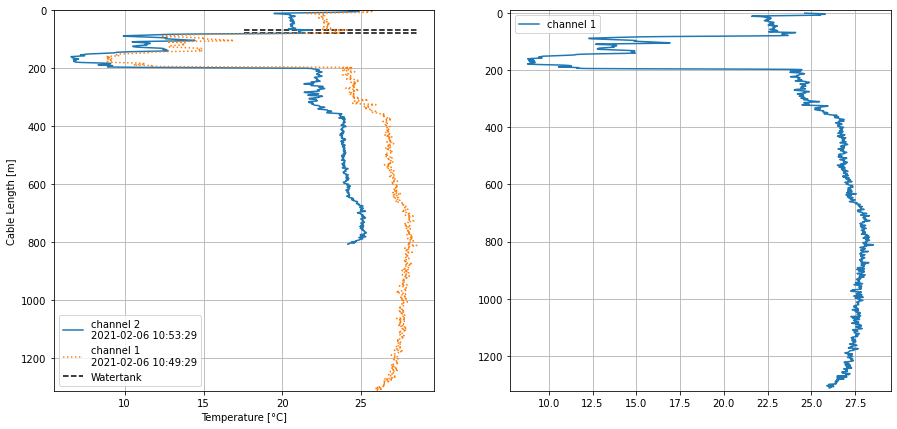

In [3]:
# Plot Data over Depth

def first_plot(temp_ch1=temp_ch1,temp_ch2=temp_ch2,column_number=500):
    """
    can also use backscattered data

    """
    ch2_picked_temp=temp_ch2[temp_ch2.columns[column_number]]
    ch1_picked_temp=temp_ch1[temp_ch1.columns[column_number]]

    # calculate shift between both curves, I think both curves have to be shifted the pt100 anyway.
    # Das zeigt eigentlich nur, dass der Verlauf der Kurven ähnlich ist und fall es noch auf pt100 normiert 
    # werden muss die Werte auf jeden Fall einiegermaßen passen.
    # But why is there a difference in the temp between both curves, this somehow is related to the measurement pyhsics i guess.
    diff = ch2_picked_temp - ch1_picked_temp
    shift=diff.mean() #not used at the moment

    # find min max length; ch1 has the longer cable
    min_yaxis=temp_ch1.index.min()
    max_yaxis=temp_ch1.index.max()
    min_xaxis=min(np.append(ch2_picked_temp,ch1_picked_temp))
    max_xaxis=max(np.append(ch2_picked_temp,ch1_picked_temp))

    fig, axs = plt.subplots(1,2,figsize=(15,7))
    axs[0].plot(ch2_picked_temp,temp_ch2.index, label="channel 2\n%.20s"%(temp_ch2.columns[column_number]))
    axs[0].plot(ch1_picked_temp,temp_ch1.index, label="channel 1\n%.20s"%(temp_ch1.columns[column_number]), linestyle=":")
    # position watertank, not exactly equal my measurements in Alsdorf these would suggest 65 to 74
    # wahrscheinlich falsch temperature plot beginnt erst beim Bohrloch?
    axs[0].hlines([69,78],xmin=min_xaxis+(max_xaxis-min_xaxis)/2,xmax=max_xaxis, colors="black",linestyle="--", label="Watertank")
    axs[0].invert_yaxis()
    axs[0].set_ylim(max_yaxis,min_yaxis)
    axs[0].grid()
    axs[0].legend()
    axs[0].set_ylabel("Cable Length [m]")
    axs[0].set_xlabel("Temperature [°C]")

    axs[1].plot(ch1_picked_temp,temp_ch1.index, label="channel 1")
    axs[1].invert_yaxis()
    axs[1].set_ylim(max_yaxis+10,min_yaxis-10)
    axs[1].grid()
    axs[1].legend()

first_plot()


In [4]:
# Gedanken zu den Plots / Daten
# im Wassertank müssen beide selbe temperatur haben. Wenn man pt100 Messungen hat könnte man die Plots einfach verschieben? 
# chan2 müsste eig. fast wie ch1 sein, da die Kabel direkt nebeneinander liegen. 
# (Im Moment ist mein Verständniss auf jeden Fall so, dass nach U-Tube das Kabel, fast an der selben Stelle wieder hoch geht)
# zwischen den beiden Kabelenden gibt es allerdings den Unterschied der verschiedenen Dämpfungen. 
# (da es hier nicht durch Mittelung gemacht werden kann muss dann, so wie ich es verstehe, die Dämpfung anhand von STandartwerten berücksichtigt werden + per Hand Störungen beseitigt werden)
# Wird Dämpfung schon korrigiert im Gerät?
# Wo beginnt das Bohrloch, ab welche Kabellänge? Bei 200 m? Ein Ausbauplan / Grundriss wo genau das Kabel lang geht wäre interressant. Sehr wichtiger Punkt.


# für alle plots funktionen erstelllen

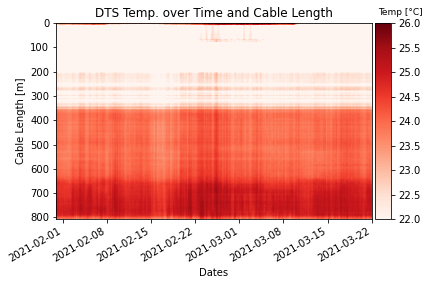

In [5]:
# Plot over Depth and Time

# date labels
dates=temp_ch2.columns.date #only year month and day
date_lims = mdates.date2num(dates) # convert date to float, so that matplotlib can work with them
date_min=date_lims[0]
date_max=date_lims[-1]

fig, ax = plt.subplots()
ax.set_title("DTS Temp. over Time and Cable Length")
im = ax.imshow(temp_ch2, interpolation = 'gaussian', cmap = 'Reds', aspect = 'auto', vmin=22 , vmax=26, extent=[date_min,date_max,temp_ch2.index.max(),temp_ch2.index.min()]) 
# definition of extend of y axis not needed because index equals length, but i think its best pracstice to definde it seperate
ax.set_ylabel('Cable Length [m]')
ax.set_xlabel('Dates')
ax.xaxis_date() #matplotlib converts labels to datetime
fig.autofmt_xdate() # makes the label of the x-axes fit better

# Colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im, cax = cax, orientation = 'vertical', fraction = 0.05, pad = - 0.05)
cbar.set_label('Temp [°C]', rotation = 0, fontsize = 9, labelpad = -20,  y = 1.08)


# den oberen part solle man wahrscheinlich abschneiden, das ist das Kabel eh noch nicht im Bohrloch oder?
# colomap ist nicht gut (irreführend, dass bei 350 m ein starker Sprung ist)

# Here I will now analyse the backscattered data

In [6]:
path_ch1_backscat=path_to_working_dir + r"\ch1_backscat_20210131_20210324.TXT"
path_ch2_backscat=path_to_working_dir + r"\ch2_backscat_20210131_20210324.TXT"
# for the negativ length there is no corresponding temperature from the device, why are here negative lengths?
backscat_ch1=import_data_alsdorf(path_ch1_backscat)
backscat_ch2=import_data_alsdorf(path_ch2_backscat)

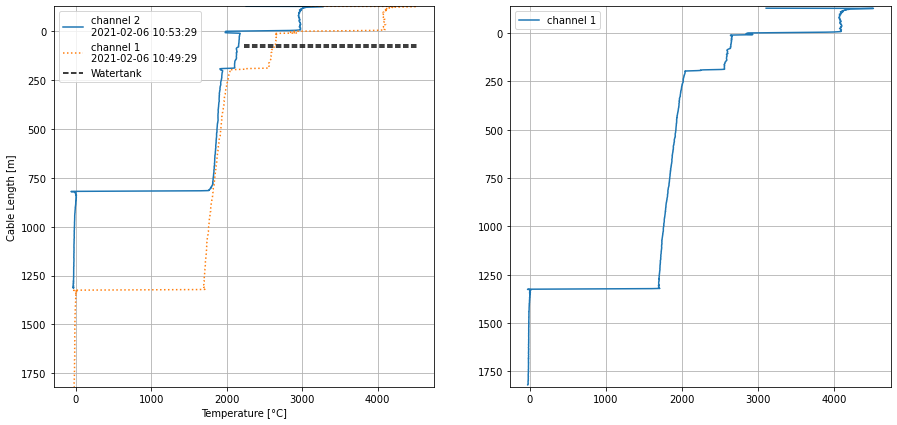

In [7]:
first_plot(temp_ch1=backscat_ch1, temp_ch2=backscat_ch2)

In [8]:
backscat_ch2

,2021-01-31 21:27:40,2021-01-31 21:43:40,2021-01-31 21:59:41,2021-01-31 22:15:42,2021-01-31 22:31:42,2021-01-31 22:47:43,2021-01-31 23:03:44,2021-01-31 23:19:45,2021-01-31 23:35:45,2021-01-31 23:51:46,...,2021-03-22 20:11:58,2021-03-22 20:27:59,2021-03-22 20:43:59,2021-03-22 21:00:00,2021-03-22 21:16:01,2021-03-22 21:32:02,2021-03-22 21:48:02,2021-03-22 22:04:03,2021-03-22 22:20:04,2021-03-22 22:36:04
Length [m],,,,,,,,,,,,,,,,,,,,,
-129.0,2403.47,2405.97,2404.42,2406.12,2405.93,2404.05,2405.37,2407.65,2408.09,2409.15,...,2361.35,2362.24,2362.07,2362.49,2364.52,2363.66,2364.46,2367.09,2367.45,2366.50
-128.0,3400.96,3404.22,3402.15,3404.32,3404.71,3402.35,3404.78,3407.21,3406.11,3406.93,...,3340.96,3341.73,3341.32,3342.11,3344.46,3343.59,3344.75,3346.20,3345.85,3344.67
-127.0,3224.37,3226.52,3225.36,3226.40,3227.16,3226.38,3228.05,3229.90,3228.47,3227.46,...,3159.22,3158.77,3158.38,3160.00,3162.39,3161.24,3161.68,3162.07,3161.73,3161.37
-126.0,3109.77,3110.33,3109.90,3110.08,3111.27,3111.48,3111.50,3112.90,3112.55,3110.94,...,3051.56,3051.00,3050.13,3051.65,3054.40,3053.68,3053.65,3053.84,3053.27,3053.43
-125.0,3066.81,3067.47,3066.92,3066.68,3068.08,3067.90,3067.12,3068.01,3068.43,3068.54,...,3026.47,3026.73,3025.36,3026.80,3029.78,3028.99,3028.89,3029.35,3028.54,3027.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310.0,-27.81,-25.80,-26.55,-25.51,-24.51,-25.40,-24.21,-23.44,-24.99,-23.35,...,-27.99,-29.47,-30.32,-30.13,-28.99,-27.85,-28.33,-28.47,-28.18,-28.88
1311.0,-33.28,-31.49,-32.63,-31.76,-30.66,-31.37,-30.88,-30.51,-31.23,-29.42,...,-33.38,-34.24,-34.50,-34.82,-33.26,-32.09,-32.95,-33.18,-33.56,-34.31
1312.0,-26.10,-24.31,-25.67,-25.08,-23.65,-24.58,-24.16,-22.69,-23.29,-22.42,...,-27.86,-27.87,-27.05,-27.60,-26.58,-26.22,-26.83,-26.60,-27.78,-28.37


In [9]:
def import_backscat_alsdorf(data_path): #noch nicht gut, anderes von temp wieder umbenennen für temp
    """ imports data to a pandas dataframe from a given path
    input: 
        data_path: str position of the data. Format has to contain all possible information from charon3: 
        This means exporting the data with all possible options of information (default). 
        This means with all box tiked in the export window.
    
    output: pandas dataframe
    """
    temp_ch = pd.read_csv(data_path, delimiter="\t", decimal=",", skiprows=2, index_col=1) 
    # set index; not really needed because index and length are the same. 
    # But I think it is best practice to use every information from the dataset

    # drop numerate column
    temp_ch = temp_ch.drop([temp_ch.columns[0]] , axis=1) # .columns is used here too

    # rename index
    temp_ch.index.names = ["Length [m]"]

    # change column name format (str) to datetime
    #temp_ch.columns = pd.to_datetime(temp_ch.columns)

    return temp_ch


path_ch2_backscat=path_to_working_dir + r"\ch2_backscat_20210131_20210324.TXT"
# for the negativ length there is no corresponding temperature from the device, why are here negative lengths?
backscat_ch2=import_backscat_alsdorf(path_ch2_backscat)

C:\Users\Mathis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,

In [10]:
backscat_ch2

,Stokes,Stokes.1,Stokes.2,Stokes.3,Stokes.4,Stokes.5,Stokes.6,Stokes.7,Stokes.8,Stokes.9,...,Stokes.4492,Stokes.4493,Stokes.4494,Stokes.4495,Stokes.4496,Stokes.4497,Stokes.4498,Stokes.4499,Stokes.4500,Stokes.4501
Length [m],,,,,,,,,,,,,,,,,,,,,
NaN,1/31/2021 9:27:40 PM,1/31/2021 9:43:40 PM,1/31/2021 9:59:41 PM,1/31/2021 10:15:42 PM,1/31/2021 10:31:42 PM,1/31/2021 10:47:43 PM,1/31/2021 11:03:44 PM,1/31/2021 11:19:45 PM,1/31/2021 11:35:45 PM,1/31/2021 11:51:46 PM,...,3/22/2021 8:11:58 PM,3/22/2021 8:27:59 PM,3/22/2021 8:43:59 PM,3/22/2021 9:00:00 PM,3/22/2021 9:16:01 PM,3/22/2021 9:32:02 PM,3/22/2021 9:48:02 PM,3/22/2021 10:04:03 PM,3/22/2021 10:20:04 PM,3/22/2021 10:36:04 PM
-129.0,"2403,47","2405,97","2404,42","2406,12","2405,93","2404,05","2405,37","2407,65","2408,09","2409,15",...,"2361,35","2362,24","2362,07","2362,49","2364,52","2363,66","2364,46","2367,09","2367,45","2366,50"
-128.0,"3400,96","3404,22","3402,15","3404,32","3404,71","3402,35","3404,78","3407,21","3406,11","3406,93",...,"3340,96","3341,73","3341,32","3342,11","3344,46","3343,59","3344,75","3346,20","3345,85","3344,67"
-127.0,"3224,37","3226,52","3225,36","3226,40","3227,16","3226,38","3228,05","3229,90","3228,47","3227,46",...,"3159,22","3158,77","3158,38","3160,00","3162,39","3161,24","3161,68","3162,07","3161,73","3161,37"
-126.0,"3109,77","3110,33","3109,90","3110,08","3111,27","3111,48","3111,50","3112,90","3112,55","3110,94",...,"3051,56","3051,00","3050,13","3051,65","3054,40","3053,68","3053,65","3053,84","3053,27","3053,43"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310.0,-27.81,-25.8,-26.55,-25.51,-24.51,-25.4,-24.21,-23.44,-24.99,-23.35,...,-27.99,-29.47,-30.32,-30.13,-28.99,-27.85,-28.33,-28.47,-28.18,-28.88
1311.0,-33.28,-31.49,-32.63,-31.76,-30.66,-31.37,-30.88,-30.51,-31.23,-29.42,...,-33.38,-34.24,-34.5,-34.82,-33.26,-32.09,-32.95,-33.18,-33.56,-34.31
1312.0,-26.1,-24.31,-25.67,-25.08,-23.65,-24.58,-24.16,-22.69,-23.29,-22.42,...,-27.86,-27.87,-27.05,-27.6,-26.58,-26.22,-26.83,-26.6,-27.78,-28.37
